In [72]:
import json
import pandas as pd
from pprint import pprint
data = open("input_csv/ed_trade_data.json")
data = json.load(data)
#len(data.keys())
#pprint (data)

In [73]:
l = list(data.keys())

In [101]:
import json
import pandas as pd
from pprint import pprint
data = open("input_csv/ed_trade_data.json")
data = json.load(data)
l = list(data.keys())
l2 = []
for i in l:
    x_i = data[i]
    df_i =  pd.DataFrame(x_i)
    df_i['datetime'] = pd.to_datetime(df_i['date'])
    df_i['price'] = df_i['price'].astype(float)
    df_i['amount'] = df_i['amount'].astype(float)
    df_i['amountBase'] = df_i['amountBase'].astype(float)
    df = df_i[['datetime', 'amount', 'amountBase', 'price']].set_index('datetime')
    pair = i
    shape = df_i.shape
    maxdate = df.index.max()
    mindate = df.index.min()
    total_days = (maxdate - mindate).days
    grouped = df.groupby(lambda x : x.month)
    grouped.index = 'month'
    a = grouped.count()
    grouped = df.groupby(lambda x: x.month)
    grouped.index = 'month'
    no_of_trades = (grouped['amount'].count())
    a = grouped['amount'].sum()
    b = grouped['amountBase'].sum()
    c = (b / a)
    if (total_days != 0):
        daily_trades_average = sum(no_of_trades) / (total_days)
    else:
        daily_trades_average = 0
    result = [pair, shape, mindate, maxdate, total_days, sum(no_of_trades), sum(a), sum(b), (sum(c)/len(c)), daily_trades_average]
    l2.append(result)
output = pd.DataFrame(l2)
output.columns = ['pair', 'shape', 'min_date', 'max_date', 'total_days', 'no_of_trades', 'volume_traded', 'total_turnover', 'avg_price_of_unit_volume', 'avg_daily_trades']
resultant = output.set_index('pair')
resultant

,shape,min_date,max_date,total_days,no_of_trades,volume_traded,total_turnover,avg_price_of_unit_volume,avg_daily_trades
pair,,,,,,,,,
ETH_NEWB,"(353, 10)",2017-08-17 03:59:39,2017-11-02 13:31:54,77,353,1.592915e+06,58.522860,3.567360e-05,4
ETH_NTC,"(500, 10)",2017-10-07 04:18:37,2017-11-02 13:04:45,26,500,3.294433e+04,244.158512,6.304795e-03,19
ETH_LNK,"(271, 10)",2017-08-17 00:23:24,2017-11-01 02:11:25,76,271,1.364495e+03,155.122273,1.041670e-01,3
ETH_IXT,"(500, 10)",2017-10-16 17:33:49,2017-11-02 11:55:33,16,500,7.868543e+05,493.627737,6.466308e-04,31
ETH_ETHP,"(177, 10)",2017-10-17 12:47:02,2017-11-02 10:47:24,15,177,5.989485e+05,14.015264,2.582241e-05,11
ETH_SUB,"(500, 10)",2017-10-24 20:54:45,2017-11-02 10:11:41,8,500,8.889812e+05,382.461776,4.114484e-04,62
ETH_1ST,"(297, 10)",2017-08-18 03:08:49,2017-11-02 08:30:48,76,297,9.278350e+04,114.536451,1.856293e-03,3
ETH_ETHG,"(408, 10)",2017-10-17 09:26:14,2017-11-02 03:29:11,15,408,7.730317e+05,66.549733,6.893105e-05,27
ETH_ETHD,"(500, 10)",2017-10-29 22:14:08,2017-11-02 12:16:46,3,500,5.051058e+05,318.079105,6.573749e-04,166


In [3]:
import pandas as pd
x1 = data[l1[4]]
df1 = pd.DataFrame(x1).set_index('date')
df1['price'] = df1['price'].astype(float)
df1['amount'] = df1['amount'].astype(float)
df2 = df1[['amount', 'amountBase', 'price']]
# amountBase = (amount * price)
# amount is equivalent to the volume
df2

,amount,amountBase,price
date,,,
2017-11-02T10:47:24.000Z,16.666667,0.0005,0.000030
2017-11-02T10:24:50.000Z,16.666667,0.0005,0.000030
2017-11-02T06:40:55.000Z,1440.000000,0.036,0.000025
2017-11-02T05:25:36.000Z,598.145748,0.01012122420496461,0.000017
2017-11-01T14:57:15.000Z,27.941870,0.000878771807397069,0.000031
2017-11-01T10:28:10.000Z,1000.000000,0.0319,0.000032
2017-11-01T10:22:16.000Z,1500.000000,0.04785,0.000032
2017-11-01T07:15:46.000Z,5000.000000,0.145,0.000029
2017-11-01T02:11:25.000Z,100.474529,0.002010495324494068,0.000020


In [5]:
df3 = df2[['price']]

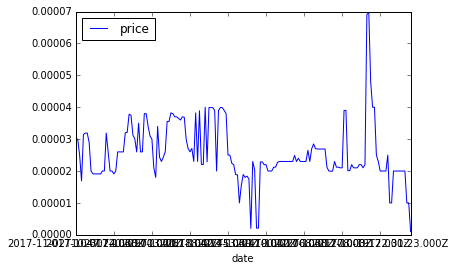

In [7]:
df3.plot()

In [9]:
df2['amount'].describe()

count      177.000000
mean      3383.889571
std       4991.146866
min          0.009938
25%        370.000000
50%       1495.364370
75%       3997.607417
max      32925.638007
Name: amount, dtype: float64